# Trends of change in the numbers of extreme weather events and Hong Kong temperature change in 1990-2019
in this notebook, we will cover the cleaning process of data and visualisation of the results by using the graph-plotting function in python. 

## 1.1 The overall change in the numbers of typhoon in Hong Kong in recent thirty years

In [2]:
# import packages
import requests
import pandas as pd
import numpy as np

# import csv format data
dftyphoon = pd.read_csv(r'/Users/lisaleung/Desktop/COM3203 digital and data journalism/Typhoon.csv')

In [3]:
# process the data of no. of typhoon
dftyphoon

,Year,1,3,8 NW,8 SW,8 NE,8 SE,9,10,Hr,Min
0,1956,5.0,4.0,0.0,0.0,0,0.0,0.0,0.0,191,NaN
1,1957,4.0,9.0,1.0,1.0,2,2.0,0.0,1.0,295,NaN
2,1958,4.0,5.0,0.0,0.0,1,0.0,0.0,0.0,214,NaN
3,1959,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,36,NaN
4,1960,11.0,7.0,0.0,2.0,2,2.0,1.0,1.0,432,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61,2017,12.0,11.0,2.0,1.0,3,2.0,1.0,1.0,259,40.0
62,2018,12.0,7.0,0.0,0.0,1,1.0,1.0,1.0,422,25.0
63,2019,7.0,3.0,0.0,0.0,1,0.0,0.0,0.0,177,25.0
64,Total,437.0,358.0,29.0,35.0,65,53.0,22.0,15.0,16849,9.0


In [4]:
#sum up the numbers of typhoon of all signals
dftyphoon['Total number of Typhoon']= dftyphoon.iloc[:, -10:-2].sum(axis=1)

In [5]:
dftyphoon

,Year,1,3,8 NW,8 SW,8 NE,8 SE,9,10,Hr,Min,Total number of Typhoon
0,1956,5.0,4.0,0.0,0.0,0,0.0,0.0,0.0,191,NaN,9.0
1,1957,4.0,9.0,1.0,1.0,2,2.0,0.0,1.0,295,NaN,20.0
2,1958,4.0,5.0,0.0,0.0,1,0.0,0.0,0.0,214,NaN,10.0
3,1959,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,36,NaN,2.0
4,1960,11.0,7.0,0.0,2.0,2,2.0,1.0,1.0,432,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2017,12.0,11.0,2.0,1.0,3,2.0,1.0,1.0,259,40.0,33.0
62,2018,12.0,7.0,0.0,0.0,1,1.0,1.0,1.0,422,25.0,23.0
63,2019,7.0,3.0,0.0,0.0,1,0.0,0.0,0.0,177,25.0,11.0
64,Total,437.0,358.0,29.0,35.0,65,53.0,22.0,15.0,16849,9.0,1014.0


In [6]:
# select relevant columns and assign selected columns back to the variable
dftyphoon=dftyphoon[['Year', 'Total number of Typhoon']]

In [7]:
#extract the data of recent 30 years
dftyphoon30=dftyphoon.iloc[34:64]

In [9]:
#define the data as str
dftyphoon30=dftyphoon30.astype(float)

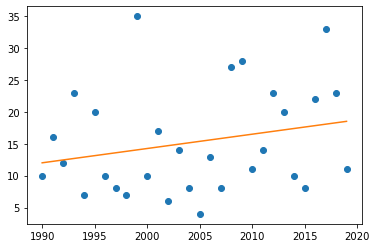

In [10]:
# plot a regression graph to show HK's no. of typhoons change 
#in the past 30 years
import matplotlib.pyplot as plt

# Convert the dataset to numpy
x = dftyphoon30.iloc[:, 0].to_numpy()
y =  dftyphoon30.iloc[:, 1].to_numpy()

# Create scatter plot
plt.plot(x, y, 'o')


# Plot a linear regression line, m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

## 1.2 The change in the numbers of typhoon in Hong Kong in every ten years

In [92]:
# Assign variable of first 10 years
dftyphoon10 = dftyphoon30[0:10]
dftyphoon10

,Year,Total number of Typhoon
34,1990,10.0
35,1991,16.0
36,1992,12.0
37,1993,23.0
38,1994,7.0
39,1995,20.0
40,1996,10.0
41,1997,8.0
42,1998,7.0
43,1999,35.0


Percentage Change = 2.50


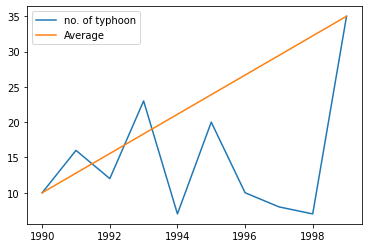

In [93]:
# plot a line graph to show the no. of typhoon from 1990 to 1999
typhoon = []
typhoonDf = dftyphoon10['Total number of Typhoon'].tolist()
diff = (typhoonDf[9] - typhoonDf[0])/ 9

for i in range (10):
  if i==0:
    typhoon.append(typhoonDf[0])
  elif i==9:
    typhoon.append(typhoonDf[9] )
  else:
    typhoon.append(typhoonDf[0] + diff*i)

df = pd.DataFrame({
   'no. of typhoon': dftyphoon10['Total number of Typhoon'].tolist(),
   'Average': typhoon
   }, index=dftyphoon10['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((typhoonDf[9] - typhoonDf[0])/typhoonDf[0]) )

In [95]:
# Assign variable of 2nd 10 years
dftyphoon20 = dftyphoon30[10:20]
dftyphoon20

,Year,Total number of Typhoon
44,2000,10.0
45,2001,17.0
46,2002,6.0
47,2003,14.0
48,2004,8.0
49,2005,4.0
50,2006,13.0
51,2007,8.0
52,2008,27.0
53,2009,28.0


Percentage Change = 1.80


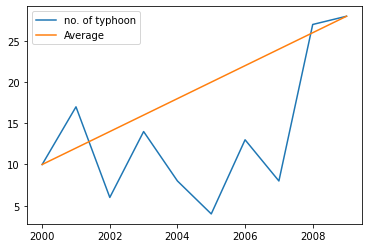

In [96]:
# plot a line graph to show the no. of typhoon from 2000 to 2009
typhoon = []
typhoonDf = dftyphoon20['Total number of Typhoon'].tolist()
diff = (typhoonDf[9] - typhoonDf[0])/ 9

for i in range (10):
  if i==0:
    typhoon.append(typhoonDf[0])
  elif i==9:
    typhoon.append(typhoonDf[9] )
  else:
    typhoon.append(typhoonDf[0] + diff*i)

df = pd.DataFrame({
   'no. of typhoon': dftyphoon20['Total number of Typhoon'].tolist(),
   'Average': typhoon
   }, index=dftyphoon20['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((typhoonDf[9] - typhoonDf[0])/typhoonDf[0]) )

In [98]:
# Assign variable of the 3rd 10 years
dftyphoon2019 = dftyphoon30[20:]
dftyphoon2019

,Year,Total number of Typhoon
54,2010,11.0
55,2011,14.0
56,2012,23.0
57,2013,20.0
58,2014,10.0
59,2015,8.0
60,2016,22.0
61,2017,33.0
62,2018,23.0
63,2019,11.0


Percentage Change = 0.00


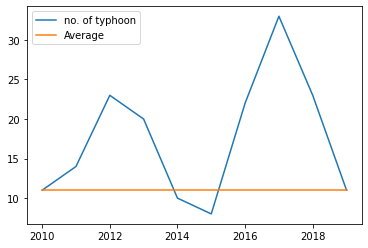

In [99]:
# plot a line graph to show the no. of typhoon from 2010 to 2019
typhoon = []
typhoonDf = dftyphoon2019['Total number of Typhoon'].tolist()
diff = (typhoonDf[9] - typhoonDf[0])/ 9

for i in range (10):
  if i==0:
    typhoon.append(typhoonDf[0])
  elif i==9:
    typhoon.append(typhoonDf[9] )
  else:
    typhoon.append(typhoonDf[0] + diff*i)

df = pd.DataFrame({
   'no. of typhoon': dftyphoon2019['Total number of Typhoon'].tolist(),
   'Average': typhoon
   }, index=dftyphoon2019['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((typhoonDf[9] - typhoonDf[0])/typhoonDf[0]) )

## 2.1 The overall change in the numbers of hot nights in Hong Kong in recent thirty years

In [11]:
# process the data of no. of hot nights
# import csv format data
dfHT = pd.read_csv(r'/Users/lisaleung/Desktop/COM3203 digital and data journalism/csv hot night.csv')

In [12]:
dfHT

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,AnnualTotal
0,1884,-,-,-,-,-,-,-,-,-,-,-,-,-
1,1885,-,-,-,-,-,-,-,-,-,-,-,-,-
2,1886,-,-,-,-,-,-,-,-,-,-,-,-,-
3,1887,-,-,-,-,-,-,-,-,-,-,-,-,-
4,1888,-,-,-,-,-,-,-,2,-,-,-,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-,-,-,-,0.33,2.03,3.8,2.1,0.47,-,-,-,8.73,NaN
131,-,-,-,-,0.37,3.5,5.43,3.23,0.57,-,-,-,13.1,NaN
132,-,-,-,-,0.43,4.3,7,4.63,1.43,-,-,-,17.8,NaN
133,-,-,-,-,0.3,2.2,2.92,2.02,0.6,0.04,-,-,8.09,NaN


In [13]:
# select relevant columns and assign selected columns back to the variable
dfHT=dfHT[['Year', 'AnnualTotal']]
dfHT

,Year,AnnualTotal
0,1884,-
1,1885,-
2,1886,-
3,1887,-
4,1888,2
...,...,...
130,-,NaN
131,-,NaN
132,-,NaN
133,-,NaN


In [14]:
#extract the data of recent 30 years
dfHT30=dfHT.iloc[99:129]
dfHT30

,Year,AnnualTotal
99,1990,24
100,1991,19
101,1992,15
102,1993,24
103,1994,4
104,1995,15
105,1996,17
106,1997,12
107,1998,36
108,1999,17


In [16]:
#define the data as str
dfHT30=dfHT30.astype(float)

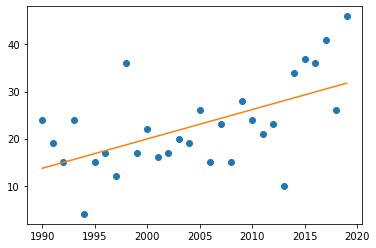

In [17]:
# plot a regression graph to show HK's no. of hot nights change 
#in the past 30 years
import matplotlib.pyplot as plt

# Convert the dataset to numpy
x = dfHT30.iloc[:, 0].to_numpy()
y =  dfHT30.iloc[:, 1].to_numpy()

# Create scatter plot
plt.plot(x, y, 'o')


# Plot a linear regression line, m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

## 2.2 The change in the numbers of hot nights in Hong Kong in every ten years

In [106]:
# Assign variable of first 10 years
dfHT10 = dfHT30[0:10]
dfHT10

,Year,AnnualTotal
99,1990,24
100,1991,19
101,1992,15
102,1993,24
103,1994,4
104,1995,15
105,1996,17
106,1997,12
107,1998,36
108,1999,17


In [110]:
#define the data as str
dfHT10=dfHT10.astype(float)

Percentage Change = -0.29


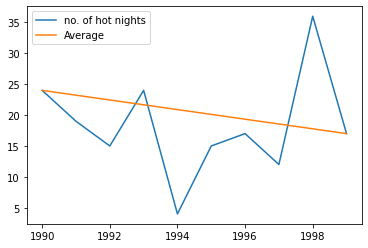

In [111]:
# plot a line graph to show the no. of hot nights from 1990 to 1999
hotnights = []
hotnightsDf = dfHT10['AnnualTotal'].tolist()
diff = (hotnightsDf[9] - hotnightsDf[0])/ 9

for i in range (10):
  if i==0:
    hotnights.append(hotnightsDf[0])
  elif i==9:
    hotnights.append(hotnightsDf[9] )
  else:
    hotnights.append(hotnightsDf[0] + diff*i)

df = pd.DataFrame({
   'no. of hot nights': dfHT10['AnnualTotal'].tolist(),
   'Average': hotnights
   }, index=dfHT10['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((hotnightsDf[9] - hotnightsDf[0])/hotnightsDf[0]) )

In [112]:
# Assign variable of 2nd 10 years
dfHT20 = dfHT30[10:20]
dfHT20

,Year,AnnualTotal
109,2000,22
110,2001,16
111,2002,17
112,2003,20
113,2004,19
114,2005,26
115,2006,15
116,2007,23
117,2008,15
118,2009,28


In [113]:
#define the data as str
dfHT20=dfHT20.astype(float)

Percentage Change = 0.27


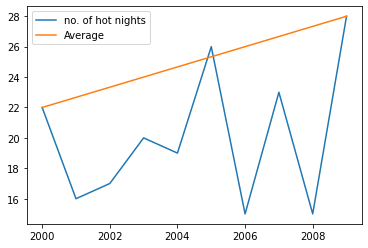

In [114]:
# plot a line graph to show the no. of hot nights from 2000 to 2009
hotnights = []
hotnightsDf = dfHT20['AnnualTotal'].tolist()
diff = (hotnightsDf[9] - hotnightsDf[0])/ 9

for i in range (10):
  if i==0:
    hotnights.append(hotnightsDf[0])
  elif i==9:
    hotnights.append(hotnightsDf[9] )
  else:
    hotnights.append(hotnightsDf[0] + diff*i)

df = pd.DataFrame({
   'no. of hot nights': dfHT20['AnnualTotal'].tolist(),
   'Average': hotnights
   }, index=dfHT20['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((hotnightsDf[9] - hotnightsDf[0])/hotnightsDf[0]) )

In [115]:
# Assign variable of the 3rd 10 years
dfHT2019 = dfHT30[20:]
dfHT2019

,Year,AnnualTotal
119,2010,24
120,2011,21
121,2012,23
122,2013,10
123,2014,34
124,2015,37
125,2016,36
126,2017,41
127,2018,26
128,2019,46


In [116]:
#define the data as str
dfHT2019=dfHT2019.astype(float)

Percentage Change = 0.92


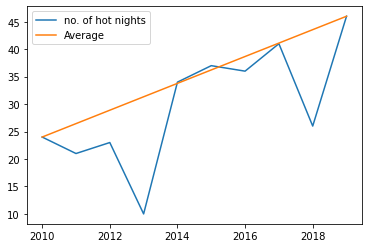

In [117]:
# plot a line graph to show the no. of hot nights from 2010 to 2019
hotnights = []
hotnightsDf = dfHT2019['AnnualTotal'].tolist()
diff = (hotnightsDf[9] - hotnightsDf[0])/ 9

for i in range (10):
  if i==0:
    hotnights.append(hotnightsDf[0])
  elif i==9:
    hotnights.append(hotnightsDf[9] )
  else:
    hotnights.append(hotnightsDf[0] + diff*i)

df = pd.DataFrame({
   'no. of hot nights': dfHT2019['AnnualTotal'].tolist(),
   'Average': hotnights
   }, index=dfHT2019['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((hotnightsDf[9] - hotnightsDf[0])/hotnightsDf[0]) )

## 3.1 The overall change in the amount of rainfall in Hong Kong in recent thirty years

In [18]:
# process the data of amount of rainfall
# import csv format data
dfrainfall = pd.read_csv(r'/Users/lisaleung/Desktop/COM3203 digital and data journalism/Rainfall.csv')
dfrainfall

,Year,Mean\nPressure\n(hPa),Absolute Daily\nMax (deg. C),Mean Daily\nMax (deg. C),Mean (deg. C),Mean Daily\nMin (deg. C),Absolute Daily\nMin (deg. C),Mean\nDew\nPoint\n(deg. C),Mean\nRelative\nHumidity\n(%),Mean\nAmount\nof\nCloud\n(%),Total\nRainfall\n(mm),Total\nBright\nSunshine\n(hours),Prevailing\nWind\nDirection\n(degrees),Mean\nWind\nSpeed\n(km/h)
0,1961,1012.6,34.2,25.6,22.9,20.8,7.3,18.6,79,66,2232.4,1981.6,***,***
1,1962,1013.2,35.5,25.8,22.7,20.4,6.0,17.9,76,58,1741.0,2395.4,***,***
2,1963,1013.4,35.6,26.5,23.3,20.9,7.1,17.8,73,52,901.1,2469.7,***,***
3,1964,1012.7,33.9,25.7,22.9,20.5,7.0,18.4,77,65,2432.1,2029.6,***,***
4,1965,1012.8,33.4,25.9,23.1,20.9,7.3,18.6,77,63,2352.6,1990.7,***,***
5,1966,1012.2,34.7,26.8,23.8,21.4,7.5,19.0,76,62,2398.2,2114.8,***,***
6,1967,1012.8,34.4,25.9,22.9,20.4,4.6,17.8,74,66,1570.6,2090.9,***,***
7,1968,1012.7,35.7,25.8,22.9,20.7,5.7,18.4,77,66,2288.2,2008.7,***,***
8,1969,1012.8,34.7,25.7,22.7,20.5,4.0,18.1,77,64,1895.5,2072.6,***,***
9,1970,1012.5,33.6,25.5,22.8,20.5,7.6,18.4,77,69,2316.3,1844.7,***,***


In [19]:
# select relevant columns
dfrainfall[['Year', 'Total\nRainfall\n(mm)']]

,Year,Total\nRainfall\n(mm)
0,1961,2232.4
1,1962,1741.0
2,1963,901.1
3,1964,2432.1
4,1965,2352.6
5,1966,2398.2
6,1967,1570.6
7,1968,2288.2
8,1969,1895.5
9,1970,2316.3


In [20]:
# assign selected columns back to the variable
dfrainfall=dfrainfall[['Year', 'Total\nRainfall\n(mm)']]

In [21]:
# select the data for the recent 30 years
# cleaned data
dfrainfall30=dfrainfall[-30:]

In [22]:
#define the data as str
dfrainfall30=dfrainfall30.astype(float)

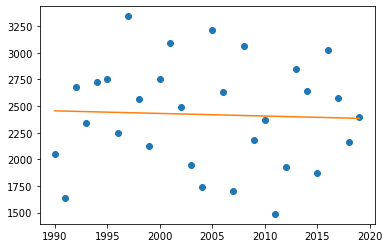

In [23]:
# plot a regression graph to show HK's no. of hot nights change 
#in the past 30 years
import matplotlib.pyplot as plt

# Convert the dataset to numpy
x = dfrainfall30.iloc[:, 0].to_numpy()
y =  dfrainfall30.iloc[:, 1].to_numpy()

# Create scatter plot
plt.plot(x, y, 'o')


# Plot a linear regression line, m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

## 3.2 The change in the amount of rainfall in Hong Kong in every ten years

In [124]:
# Assign variable of first 10 years
dfrainfall10 = dfrainfall30[0:10]

In [125]:
dfrainfall10

,Year,Total\nRainfall\n(mm)
29,1990,2046.9
30,1991,1639.1
31,1992,2678.8
32,1993,2343.9
33,1994,2725.6
34,1995,2754.4
35,1996,2249.1
36,1997,3343.0
37,1998,2564.6
38,1999,2129.1


Percentage Change = 0.04


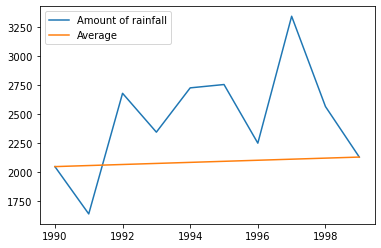

In [126]:
# plot a line graph to show the amount of rainfall from 1990 to 1999
rain = []
rainDf = dfrainfall10['Total\nRainfall\n(mm)'].tolist()
diff = (rainDf[9] - rainDf[0])/ 9

for i in range (10):
  if i==0:
    rain.append(rainDf[0])
  elif i==9:
    rain.append(rainDf[9] )
  else:
    rain.append(rainDf[0] + diff*i)

df = pd.DataFrame({
   'Amount of rainfall': dfrainfall10['Total\nRainfall\n(mm)'].tolist(),
   'Average': rain
   }, index=dfrainfall10['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((rainDf[9] - rainDf[0])/rainDf[0]) )

In [127]:
# Assign variable of 2nd 10 years
dfrainfall20 = dfrainfall30[10:20]
dfrainfall20

,Year,Total\nRainfall\n(mm)
39,2000,2752.3
40,2001,3091.8
41,2002,2490.0
42,2003,1941.9
43,2004,1738.6
44,2005,3214.5
45,2006,2627.8
46,2007,1706.9
47,2008,3066.2
48,2009,2182.3


Percentage Change = -0.21


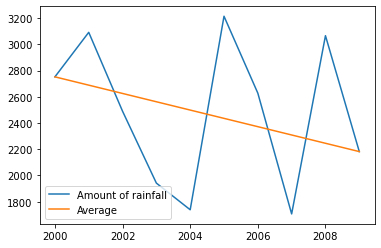

In [128]:
# plot a line graph to show the amount of rainfall from 2000 to 2009
rain = []
rainDf = dfrainfall20['Total\nRainfall\n(mm)'].tolist()
diff = (rainDf[9] - rainDf[0])/ 9

for i in range (10):
  if i==0:
    rain.append(rainDf[0])
  elif i==9:
    rain.append(rainDf[9] )
  else:
    rain.append(rainDf[0] + diff*i)

df = pd.DataFrame({
   'Amount of rainfall': dfrainfall20['Total\nRainfall\n(mm)'].tolist(),
   'Average': rain
   }, index=dfrainfall20['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((rainDf[9] - rainDf[0])/rainDf[0]) )

In [129]:
# Assign variable of the 3rd 10 years
dfrainfall2019 = dfrainfall30[20:]
dfrainfall2019

,Year,Total\nRainfall\n(mm)
49,2010,2371.7
50,2011,1487.2
51,2012,1924.7
52,2013,2847.3
53,2014,2638.3
54,2015,1874.5
55,2016,3026.8
56,2017,2572.1
57,2018,2162.9
58,2019,2396.2


Percentage Change = 0.01


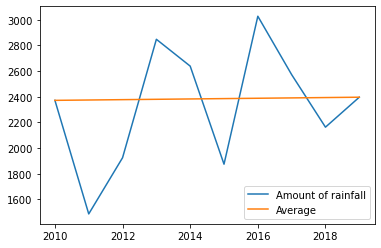

In [130]:
# plot a line graph to show the amount of rainfall from 2010 to 2019
rain = []
rainDf = dfrainfall2019['Total\nRainfall\n(mm)'].tolist()
diff = (rainDf[9] - rainDf[0])/ 9

for i in range (10):
  if i==0:
    rain.append(rainDf[0])
  elif i==9:
    rain.append(rainDf[9] )
  else:
    rain.append(rainDf[0] + diff*i)

df = pd.DataFrame({
   'Amount of rainfall': dfrainfall2019['Total\nRainfall\n(mm)'].tolist(),
   'Average': rain
   }, index=dfrainfall2019['Year'].tolist())
lines = df.plot.line()

print ("Percentage Change = %.2f" %((rainDf[9] - rainDf[0])/rainDf[0]) )

# 4.0 Find out the correlation between the change in the numbers of extreme weather events and change in annual mean temperature in Hong Kong 

## 4.1 the correlation between the change in the numbers of typhoon and change in annual mean temperature in Hong Kong

In [24]:
# process the data of amount of hk temp
# import csv format data
dfHKTemp = pd.read_csv(r'/Users/lisaleung/Desktop/COM3203 digital and data journalism/Rainfall.csv')

In [25]:
# process the data of Hong Kong temperature change 
dfHKTemp

,Year,Mean\nPressure\n(hPa),Absolute Daily\nMax (deg. C),Mean Daily\nMax (deg. C),Mean (deg. C),Mean Daily\nMin (deg. C),Absolute Daily\nMin (deg. C),Mean\nDew\nPoint\n(deg. C),Mean\nRelative\nHumidity\n(%),Mean\nAmount\nof\nCloud\n(%),Total\nRainfall\n(mm),Total\nBright\nSunshine\n(hours),Prevailing\nWind\nDirection\n(degrees),Mean\nWind\nSpeed\n(km/h)
0,1961,1012.6,34.2,25.6,22.9,20.8,7.3,18.6,79,66,2232.4,1981.6,***,***
1,1962,1013.2,35.5,25.8,22.7,20.4,6.0,17.9,76,58,1741.0,2395.4,***,***
2,1963,1013.4,35.6,26.5,23.3,20.9,7.1,17.8,73,52,901.1,2469.7,***,***
3,1964,1012.7,33.9,25.7,22.9,20.5,7.0,18.4,77,65,2432.1,2029.6,***,***
4,1965,1012.8,33.4,25.9,23.1,20.9,7.3,18.6,77,63,2352.6,1990.7,***,***
5,1966,1012.2,34.7,26.8,23.8,21.4,7.5,19.0,76,62,2398.2,2114.8,***,***
6,1967,1012.8,34.4,25.9,22.9,20.4,4.6,17.8,74,66,1570.6,2090.9,***,***
7,1968,1012.7,35.7,25.8,22.9,20.7,5.7,18.4,77,66,2288.2,2008.7,***,***
8,1969,1012.8,34.7,25.7,22.7,20.5,4.0,18.1,77,64,1895.5,2072.6,***,***
9,1970,1012.5,33.6,25.5,22.8,20.5,7.6,18.4,77,69,2316.3,1844.7,***,***


In [26]:
# select relevant columns
dfHKTemp[['Year', 'Mean (deg. C)']]

,Year,Mean (deg. C)
0,1961,22.9
1,1962,22.7
2,1963,23.3
3,1964,22.9
4,1965,23.1
5,1966,23.8
6,1967,22.9
7,1968,22.9
8,1969,22.7
9,1970,22.8


In [27]:
# assign selected columns back to the variable
dfHKTemp=dfHKTemp[['Year', 'Mean (deg. C)']]

In [28]:
# select the data for the recent 30 years
# cleaned data
dfHKTemp30=dfHKTemp[-30:]
dfHKTemp30

,Year,Mean (deg. C)
29,1990,23.1
30,1991,23.5
31,1992,22.8
32,1993,23.1
33,1994,23.6
34,1995,22.8
35,1996,23.3
36,1997,23.3
37,1998,24.0
38,1999,23.8


Correlation coefficient between annual mean temperature and no. of typhoon in HK:
           temp.  typhoon
temp.    1.00000 -0.02788
typhoon -0.02788  1.00000



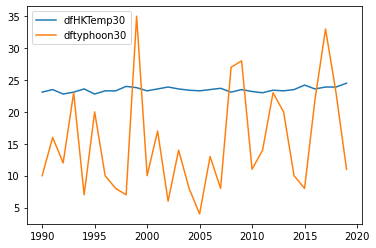

In [34]:
# compare and contrast the relationship of the trend of temp. change and no. of typhoon in HK
import pandas as pd
import numpy as np
import scipy as sp

df = pd.DataFrame({
   'dfHKTemp30': dfHKTemp30['Mean (deg. C)'].tolist(),
   'dftyphoon30': dftyphoon30['Total number of Typhoon'].tolist()
   }, index=dftyphoon30['Year'].tolist())
lines = df.plot.line()

column_1 = dfHKTemp30['Mean (deg. C)']
column_2 = dftyphoon30['Total number of Typhoon']


values = {"temp.":dfHKTemp30['Mean (deg. C)'].tolist(),
          "typhoon":dftyphoon30['Total number of Typhoon'].tolist()}
dataFrame = pd.DataFrame(data=values);
corrrelation = dataFrame.corr()

# Find the correlationship between the trend of temp. change and no. of typhoon in HK
# Correlation is a statistical measure that expresses the extent to which two variables are linearly related.
# It's a common tool for describing simple relationships without making a statement about cause and effect.

print("Correlation coefficient between annual mean temperature and no. of typhoon in HK:")
print(corrrelation)
print()

## 4.2 the correlation between the change in the numbers of hot nights and change in annual mean temperature in Hong Kong

Correlation coefficient between annual mean temperature and no. of hot nights in HK:
               temp.  hot nights
temp.       1.000000    0.573544
hot nights  0.573544    1.000000



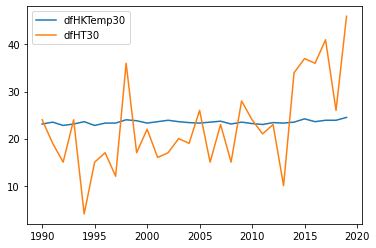

In [33]:
# compare and contrast the relationship of the trend of temp. change and no. of hot nights in HK
import pandas as pd
import numpy as np
import scipy as sp

df = pd.DataFrame({
   'dfHKTemp30': dfHKTemp30['Mean (deg. C)'].tolist(),
   'dfHT30': dfHT30['AnnualTotal'].tolist()
   }, index=dfHT30['Year'].tolist())
lines = df.plot.line()

column_1 = dfHKTemp30['Mean (deg. C)']
column_2 = dfHT30['AnnualTotal']


values = {"temp.":dfHKTemp30['Mean (deg. C)'].tolist(),
          "hot nights":dfHT30['AnnualTotal'].tolist()}
dataFrame = pd.DataFrame(data=values);
corrrelation = dataFrame.corr()

# Find the correlationship between the trend of temp. change and no. of hot nights in HK
# Correlation is a statistical measure that expresses the extent to which two variables are linearly related.
# It's a common tool for describing simple relationships without making a statement about cause and effect.

print("Correlation coefficient between annual mean temperature and no. of hot nights in HK:")
print(corrrelation)
print()

## 4.3 the correlation between the change in the amount of rainfalls and change in annual mean temperature in Hong Kong

Correlation coefficient between annual mean temperature and the amount of rainfall in HK:
             temp.  rainfall
temp.     1.000000 -0.147904
rainfall -0.147904  1.000000



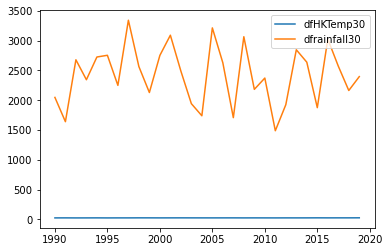

In [32]:
# compare and contrast the relationship of the trend of temp. change and the amount of rainfall in HK
import pandas as pd
import numpy as np
import scipy as sp

df = pd.DataFrame({
   'dfHKTemp30': dfHKTemp30['Mean (deg. C)'].tolist(),
   'dfrainfall30': dfrainfall30['Total\nRainfall\n(mm)'].tolist()
   }, index=dfrainfall30['Year'].tolist())
lines = df.plot.line()

column_1 = dfHKTemp30['Mean (deg. C)']
column_2 = dfrainfall30['Total\nRainfall\n(mm)']


values = {"temp.":dfHKTemp30['Mean (deg. C)'].tolist(),
          "rainfall":dfrainfall30['Total\nRainfall\n(mm)'].tolist()}
dataFrame = pd.DataFrame(data=values);
corrrelation = dataFrame.corr()

# Find the correlationship between the trend of temp. change and the amount of rainfall in HK
# Correlation is a statistical measure that expresses the extent to which two variables are linearly related.
# It's a common tool for describing simple relationships without making a statement about cause and effect.

print("Correlation coefficient between annual mean temperature and the amount of rainfall in HK:")
print(corrrelation)
print()